In [2]:
import os
import urllib.request
import tarfile

# URL of the tar file
for i in range(1, 6):

    if i <= 9:
        padded_number = str(i).zfill(2)
    else:
        padded_number = str(i)

    filename = f"fish_{padded_number}.tar"
    print(filename)
    url = f"https://groups.inf.ed.ac.uk/vision/DATASETS/FISH4KNOWLEDGE/WEBSITE/GROUNDTRUTH/RECOG/Archive/fish_image/{filename}"
    # Download the tar file
    tar_filename = os.path.join("Images/Test", filename)
    urllib.request.urlretrieve(url, tar_filename)

    # Extract the contents of the tar file
    with tarfile.open(tar_filename, 'r') as tar:
        tar.extractall(path="Images/Test")
 
    # Clean up: remove the downloaded tar file
    os.remove(tar_filename)

print("Download and extraction complete.")

fish_01.tar
fish_02.tar
fish_03.tar
fish_04.tar
fish_05.tar
Download and extraction complete.


In [2]:
import torch
import os
from skimage import io
from torchvision import transforms
from FishModel import FishModel

transform = transforms.Resize((256, 256))

model = FishModel()
model.load_state_dict(torch.load('Models/latest.pt', map_location=torch.device('cpu')))
model.to("cpu")

reference_image_dir = "Images/References"

reference_images = []

for file in os.listdir(reference_image_dir):
    img = io.imread(os.path.join(reference_image_dir, file))
    img = torch.from_numpy(img).permute(2, 0, 1) / 255.0
    img = transform(img).unsqueeze(0)

    # Get the embeddings
    emb = model(img)

    reference_images.append(emb.detach().numpy())

correct = 0
total = 0

test_image_dir = "Images/Dataset"

actual_classes = []
predicted_classes = []

for folder in os.listdir(test_image_dir):

    # Get the class of the test image
    actual_cls = int(folder.split("_")[1])

    path = os.path.join(test_image_dir, folder)

    print(f"Testing class {actual_cls}...")

    # For each file in the "Images/Test" folder, predict the class
    for file in os.listdir(path):
        img = io.imread(os.path.join(path, file))
        img = torch.from_numpy(img).permute(2,0,1) / 255.0
        img = transform(img).unsqueeze(0)

        pred_cls = model.predict(img, reference_images)

        # Add 1 to the predicted class (Because the folder names start from 1)
        pred_cls = pred_cls + 1

        # If the predicted class is the same as the actual class, increment the correct counter
        if pred_cls == actual_cls:
            correct += 1

        if correct % 100 == 0:
            print(f"Correct: {correct}, Total: {total}, Accuracy: {correct/total * 100:.2f}%")

        total += 1

        actual_classes.append(actual_cls)
        predicted_classes.append(pred_cls)

    # print(f"Predicted class: {pred +1 }, Distance: {distances[pred]}, File: {file}")

print(f"Accuracy: {correct/total * 100:.2f}%")


# Total accuracy of all images: 79.13%

C:\Users\kjell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\kjell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing).

Testing class 1...
Correct: 100, Total: 163, Accuracy: 61.35%
Correct: 200, Total: 301, Accuracy: 66.45%
Correct: 300, Total: 464, Accuracy: 64.66%
Correct: 400, Total: 577, Accuracy: 69.32%
Correct: 500, Total: 719, Accuracy: 69.54%
Correct: 500, Total: 720, Accuracy: 69.44%
Correct: 500, Total: 721, Accuracy: 69.35%
Correct: 500, Total: 722, Accuracy: 69.25%
Correct: 600, Total: 851, Accuracy: 70.51%
Correct: 700, Total: 1000, Accuracy: 70.00%
Correct: 800, Total: 1137, Accuracy: 70.36%
Correct: 900, Total: 1271, Accuracy: 70.81%
Correct: 1000, Total: 1409, Accuracy: 70.97%
Correct: 1000, Total: 1410, Accuracy: 70.92%
Correct: 1100, Total: 1560, Accuracy: 70.51%
Correct: 1200, Total: 1698, Accuracy: 70.67%
Correct: 1300, Total: 1842, Accuracy: 70.58%
Correct: 1400, Total: 1961, Accuracy: 71.39%
Correct: 1500, Total: 2085, Accuracy: 71.94%
Correct: 1600, Total: 2201, Accuracy: 72.69%
Correct: 1700, Total: 2348, Accuracy: 72.40%
Correct: 1800, Total: 2515, Accuracy: 71.57%
Correct: 190

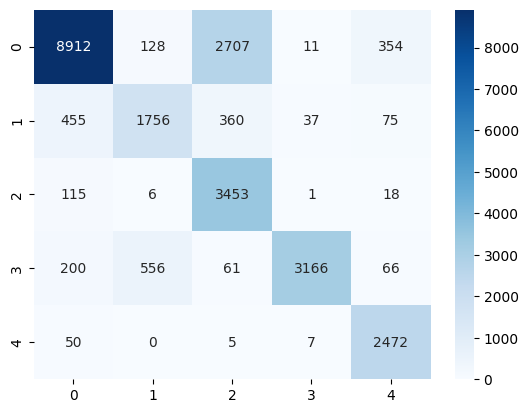

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn

matrix = confusion_matrix(actual_classes, predicted_classes)

heatmap = seaborn.heatmap(matrix, annot=True, fmt='g', cmap='Blues')

figure = heatmap.get_figure()
figure.savefig("cm_efficientnet_fulldataset.png", dpi=400)